### Syed Muhammad Zaid | 20B-052-SE

##### Task - 1

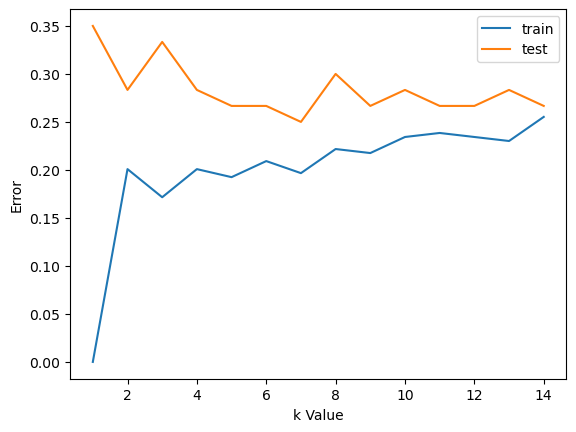

Accuracy Score: 0.75


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Load the dataset
heart_data = pd.read_csv("heart.csv")

# Define features and target
X = heart_data.drop(columns=['DEATH_EVENT'])
Y = heart_data['DEATH_EVENT']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize error lists
error1 = []
error2 = []

# Calculate error for different k values
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_train)
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# Plot the errors
plt.plot(range(1, 15), error1, label='train')
plt.plot(range(1, 15), error2, label='test')

plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
plt.show()

# Train the model with the optimal k value
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print accuracy score
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

##### Task - 2

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

imdb_data = pd.read_csv("IMDBdata_MainData.csv")
imdb_data['Plot'].fillna("", inplace=True)

documents = imdb_data['Plot']
count_vectorizer = CountVectorizer(stop_words='english')
sparse_matrix = count_vectorizer.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names_out(), index=imdb_data.index)

cosine_sim = cosine_similarity(df, df)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.05025189 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.05025189 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


##### Task - 3

In [ ]:
import pandas as pd

# Create sample data
data = {
    'Speed': [4, 5, 7, 9, 13],
    'Agility': [3, 1, 2, 9, 7]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('Agility_Speed.csv', index=False)

# Display DataFrame
df

,Speed,Agility
0,4,3
1,5,1
2,7,2
3,9,9
4,13,7


##### Task - 4

[[2 0]]
[[1.80277564 2.06155281]]


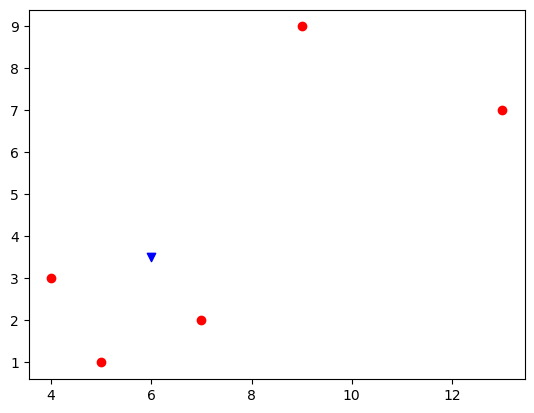

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

data = pd.read_csv('Agility_Speed.csv')
df = pd.DataFrame(data)

X = df['Speed']
y = df['Agility']

points = list(zip(X, y))
tree = KDTree(points, leaf_size=2)

dist, ind = tree.query([(6, 3.5)], k=2)
print(ind)
print(dist)

plt.scatter(X, y, color='red', marker='o')
plt.scatter(6, 3.5, color='blue', marker='v')
plt.show()

##### Task - 5

In [ ]:
import pandas as pd
from scipy import linalg
import numpy as np
from scipy.stats import chi2

data = pd.read_csv('diabetes.csv')
df = data.iloc[:, [1, 2, 5]]

def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data, axis=0)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df['mahala'] = mahalanobis(x=df, data=df[['Glucose', 'BloodPressure', 'BMI']])
critical_value = chi2.ppf(0.95, df=3)
df['p_value'] = 1 - chi2.cdf(df['mahala'], 3)

extreme_values = df[df['p_value'] < 0.05]
print(extreme_values)

     Glucose  BloodPressure   BMI     mahala   p_value
7        115              0  35.3  14.962165  0.001849
9        125             96   0.0  24.076328  0.000024
15       100              0  30.0  13.432106  0.003790
18       103             30  43.3   8.875524  0.030992
49       105              0   0.0  23.295053  0.000035
60        84              0   0.0  22.863511  0.000043
75         0             48  24.7  14.569209  0.002224
78       131              0  43.2  19.311096  0.000236
81        74              0   0.0  22.979847  0.000041
106       96            122  22.4  12.454303  0.005978
120      162             76  53.2   7.977000  0.046489
125       88             30  55.0  19.359572  0.000230
145      102             75   0.0  18.772297  0.000305
172       87              0  28.9  13.582847  0.003532
177      129            110  67.1  21.332889  0.000090
182        0             74  27.7  15.009779  0.001808
193      135              0  52.3  26.774374  0.000007
222      1

C:\Users\Hp\AppData\Local\Temp\ipykernel_30696\3069220338.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mahala'] = mahalanobis(x=df, data=df[['Glucose', 'BloodPressure', 'BMI']])
C:\Users\Hp\AppData\Local\Temp\ipykernel_30696\3069220338.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_value'] = 1 - chi2.cdf(df['mahala'], 3)
